In [208]:
import pandas as pd
import numpy as np
import os
import scipy
from math import *
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

SyntaxError: import * only allowed at module level (<ipython-input-208-e29aac7f7d7f>, line 2)

In [43]:
os.chdir("B:/Projects/Analysis/adaprojectanalysis/CompareTwoPhoneData/data")

In [8]:
# direct compare two
zte = pd.read_csv("zte/dataset2/Freesacle MMA845X Accelerometer.csv", delimiter= ",", names = ["timestamp", "x", "y", "z"])
hashtag = pd.read_csv("hashtag/dataset2/ACCELEROMETER.csv", delimiter= ",", names = ["timestamp", "x", "y", "z"])

In [45]:
zte.head()

Empty DataFrame
Columns: [timestamp, x, y, z]
Index: []

In [46]:
hashtag.head()

Empty DataFrame
Columns: [timestamp, x, y, z]
Index: []

In [47]:
zte.drop(zte.tail(12*3).index, inplace=True)
zte.drop(zte.head(12*3).index, inplace=True)
zte.drop('timestamp',1)
hashtag.drop(hashtag.tail(70*3).index, inplace=True)
hashtag.drop(hashtag.head(70*3).index, inplace=True)
hashtag.drop('timestamp',1)

Empty DataFrame
Columns: [x, y, z]
Index: []

In [48]:
zte.describe()

timestamp    x    y    z
count        0.0  0.0  0.0  0.0
mean         NaN  NaN  NaN  NaN
std          NaN  NaN  NaN  NaN
min          NaN  NaN  NaN  NaN
25%          NaN  NaN  NaN  NaN
50%          NaN  NaN  NaN  NaN
75%          NaN  NaN  NaN  NaN
max          NaN  NaN  NaN  NaN

In [49]:
hashtag.describe()

timestamp    x    y    z
count        0.0  0.0  0.0  0.0
mean         NaN  NaN  NaN  NaN
std          NaN  NaN  NaN  NaN
min          NaN  NaN  NaN  NaN
25%          NaN  NaN  NaN  NaN
50%          NaN  NaN  NaN  NaN
75%          NaN  NaN  NaN  NaN
max          NaN  NaN  NaN  NaN

In [132]:
zte['magnitude'] = zte['x'] + zte['y'] + zte['z']
zte['magnitude'] = zte['magnitude']**(1/2)
hashtag['magnitude'] = hashtag['x'] + hashtag['y'] + hashtag['z']
hashtag['magnitude'] = hashtag['magnitude']**(1/2)

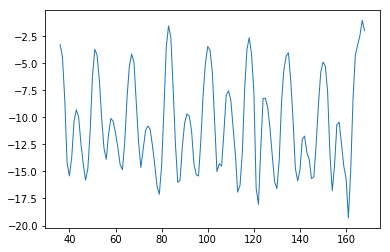

In [91]:
plt.plot(zte['x'], linewidth=1.0)

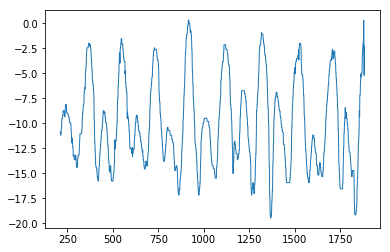

In [73]:
plt.plot(hashtag['x'], linewidth=1.0)

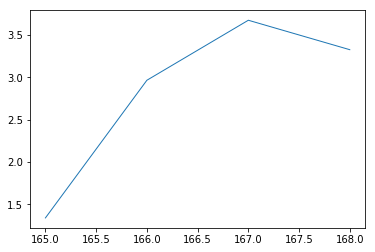

In [135]:
plt.plot(zte['magnitude'], linewidth=1.0)

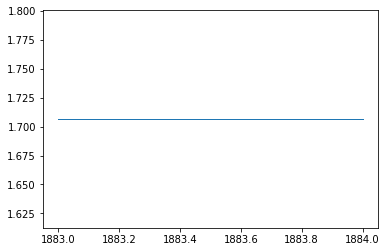

In [98]:
plt.plot(hashtag['magnitude'], linewidth=1.0)

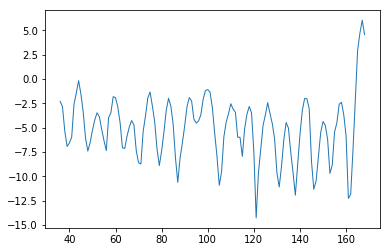

In [99]:
plt.plot(zte['y'], linewidth=1.0)

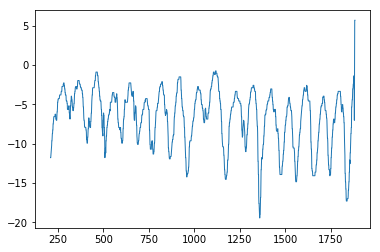

In [100]:
plt.plot(hashtag['y'], linewidth=1.0)

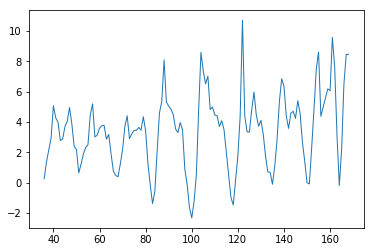

In [101]:
plt.plot(zte['z'], linewidth=1.0)

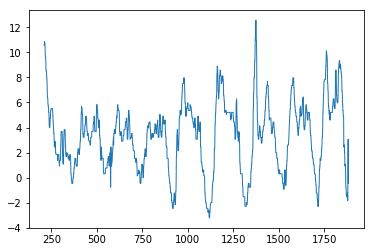

In [102]:
plt.plot(hashtag['z'], linewidth=1.0)

In [106]:
zte['magnitude'].astype(float)

36          NaN
37          NaN
38          NaN
39          NaN
40          NaN
41          NaN
42          NaN
43          NaN
44          NaN
45          NaN
46          NaN
47          NaN
48          NaN
49          NaN
50          NaN
51          NaN
52          NaN
53          NaN
54          NaN
55          NaN
56          NaN
57          NaN
58          NaN
59          NaN
60          NaN
61          NaN
62          NaN
63          NaN
64          NaN
65          NaN
         ...   
139         NaN
140         NaN
141         NaN
142         NaN
143         NaN
144         NaN
145         NaN
146         NaN
147         NaN
148         NaN
149         NaN
150         NaN
151         NaN
152         NaN
153         NaN
154         NaN
155         NaN
156         NaN
157         NaN
158         NaN
159         NaN
160         NaN
161         NaN
162         NaN
163         NaN
164         NaN
165    1.338231
166    2.963432
167    3.672076
168    3.324400
Name: magnitude, Length:

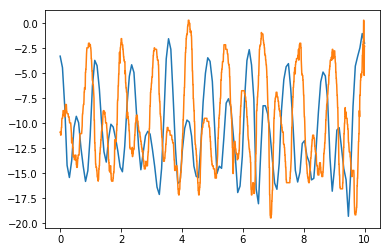

In [128]:
x1, x2 = [np.linspace(0, 10, num) for num in [133, 1675]]
y1 = zte.x
y2 = hashtag.x
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.show()

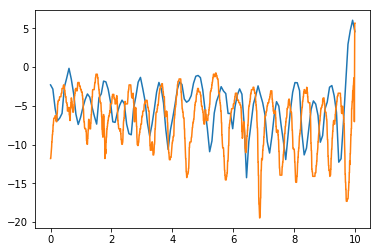

In [129]:
x1, x2 = [np.linspace(0, 10, num) for num in [133, 1675]]
y1 = zte.y
y2 = hashtag.y
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.show()

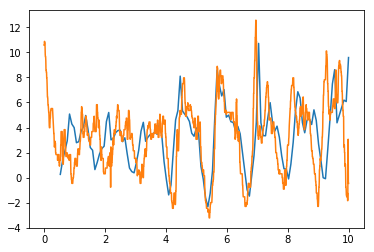

In [168]:
x1, x2 = [np.linspace(0, 10, num) for num in [133, 1675]]
y1 = zte.z.shift(7)
y2 = hashtag.z
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.show()

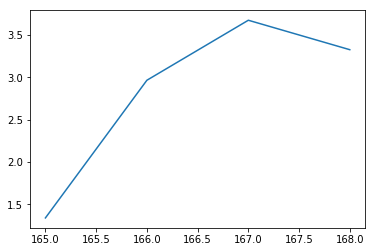

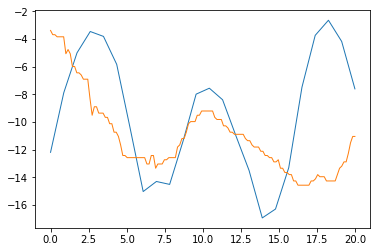

In [207]:
x1, x2 = [np.linspace(0, 20, num) for num in [24, 140]]
y1 = zte.x.shift(-1).iloc[12*5:12*7]
y2 = hashtag.x.iloc[70*5:70*7]
plt.plot(x1, y1,linewidth=1.0)
plt.plot(x2, y2,linewidth=1.0)
plt.show()

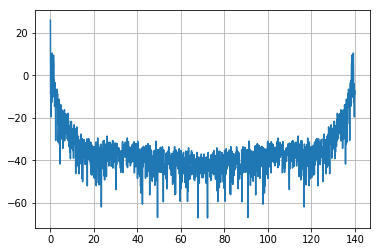

In [215]:
# https://dsp.stackexchange.com/questions/40766/calculating-values-of-frequency-bins-in-python/40768#40768
T = 10  # Duration in seconds
#f0 = 100  # Fundamental frequency
#Fs = 140  # Sampling frequency
Fs = 140

# Time domain signal
t = np.arange(0, T*Fs)/Fs
#x = np.sin(2*np.pi*f0*t)
x = hashtag['x'].to_numpy()
N = x.size

# DFT
X = np.fft.fft(x)
X_db = 20*np.log10(2*np.abs(X)/N)
#f = np.fft.fftfreq(N, 1/Fs)
f = np.arange(0, N)*Fs/N

plt.plot(f, X_db)
plt.grid()
plt.show()

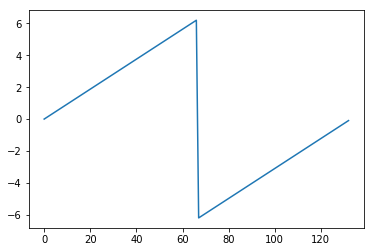

In [243]:
signal = zte['x'].to_numpy(dtype=float)
fourier = np.fft.fft(signal)
n = signal.size
timestep = 0.08
freq = np.fft.fftfreq(n, d=timestep)
plt.plot(freq)

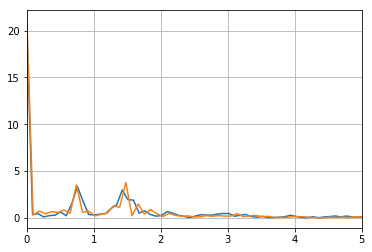

In [272]:
from scipy.fftpack import fft
# Number of sample points
N = int(hashtag.x.count())
N1 = int(zte.x.count())
# sample spacing
T = 1.0 / 140.0
T2 = 1.0 / 12.0
x = np.linspace(0.0, N*T, N)
#y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
y = hashtag.x.to_numpy()
y1 = zte.x.to_numpy()
yf = fft(y)
yf1 = fft(y1)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
xf1 = np.linspace(0.0, 1.0/(2.0*T2), N1//2)
plt.xlim(0,5)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.plot(xf1, 2.0/N1 * np.abs(yf1[0:N1//2]))
plt.grid()
plt.show()
